In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [176]:
dataset_file = '../datasets/Smarket.csv'
data = pd.read_csv(dataset_file, index_col=0)
data.Direction = data.Direction.apply(lambda x: 1 if x == 'Up' else 0)
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [177]:
data.loc[data.isna().any(axis=1)]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction


In [178]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,0.518400
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,0.499861
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,0.000000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,0.000000
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,1.000000
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,1.000000
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000,1.000000


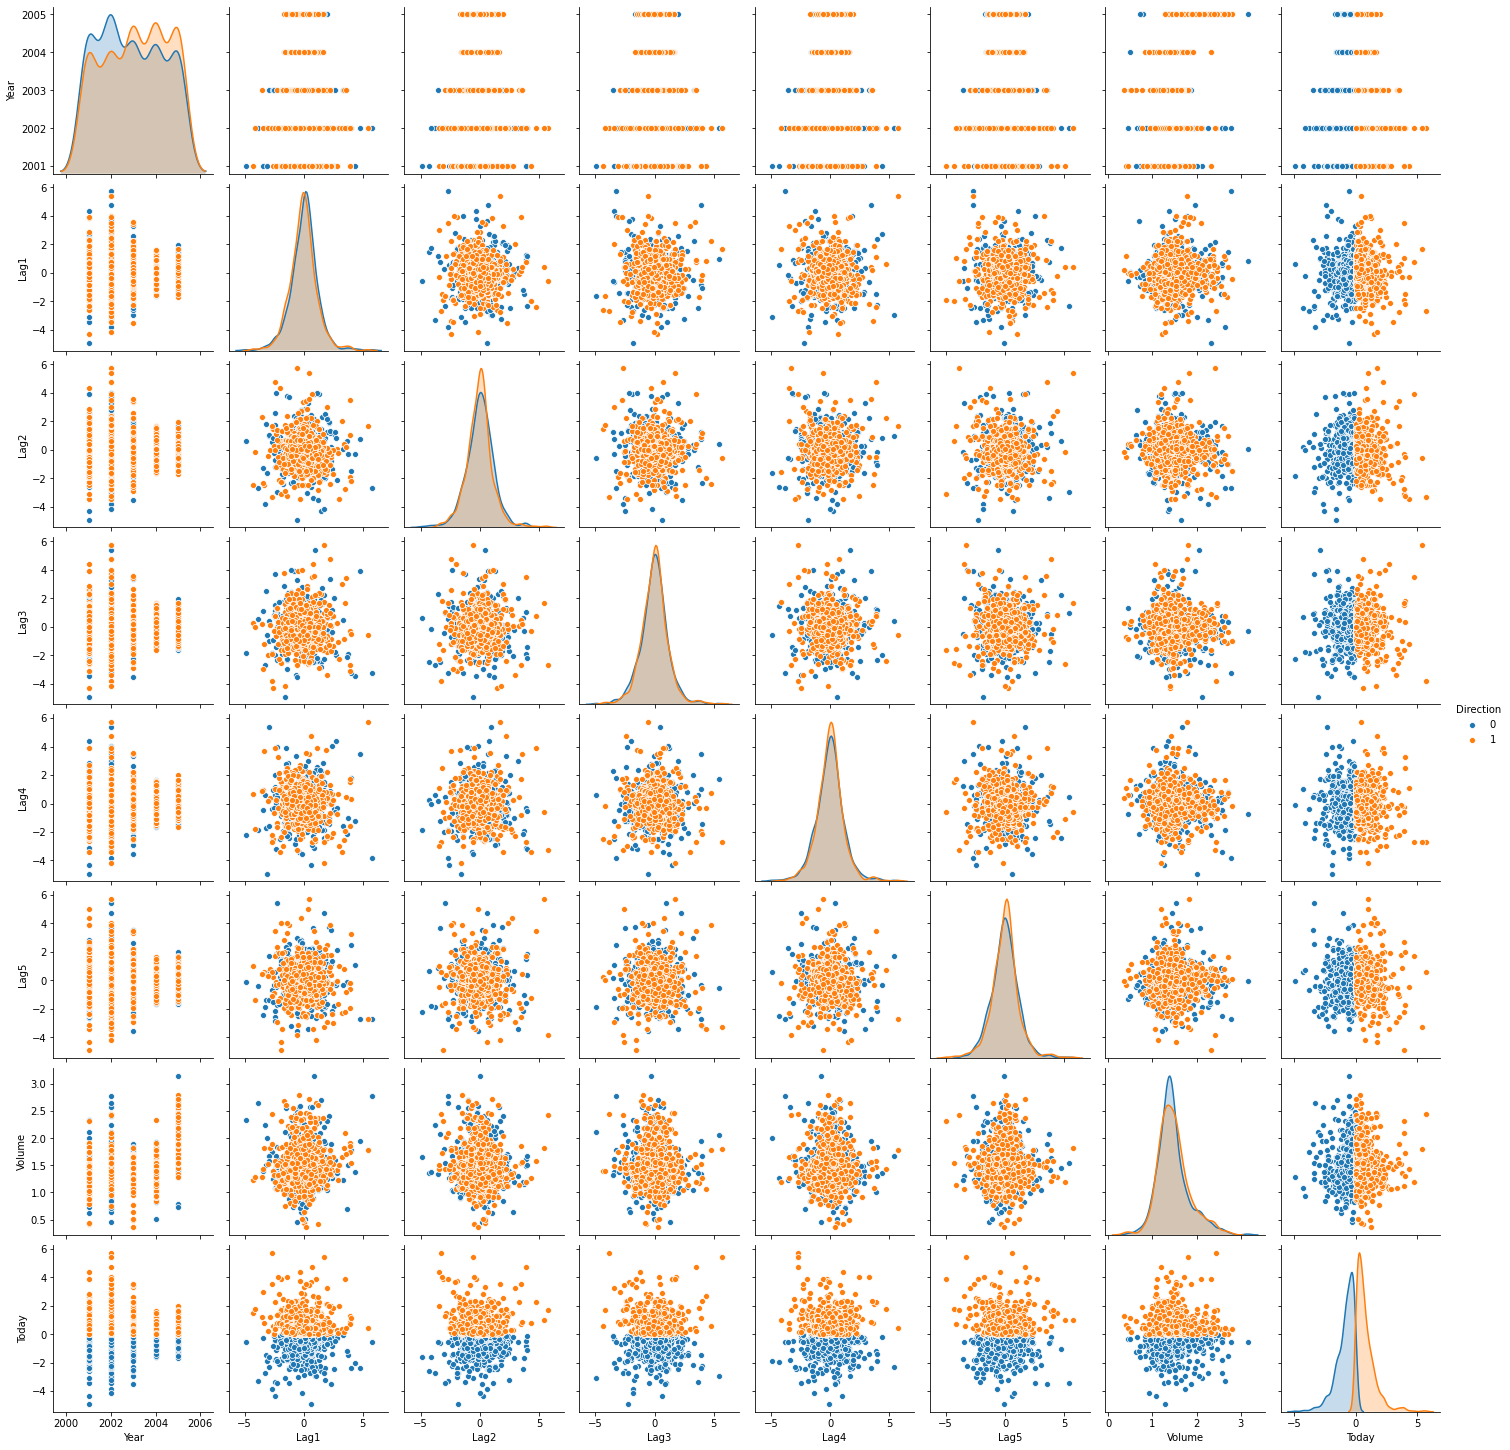

In [179]:
sns.pairplot(data, hue='Direction')

<AxesSubplot:>

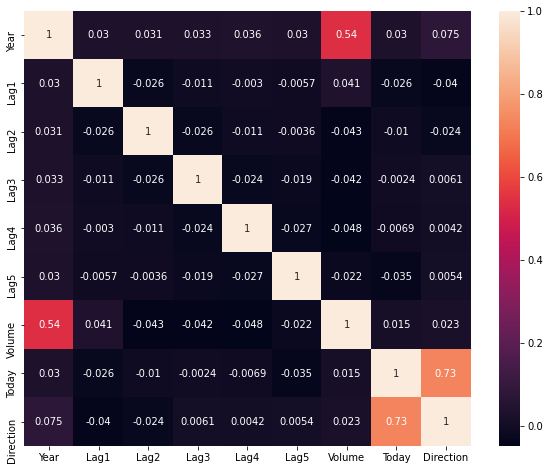

In [180]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)

In [181]:
model = sm.Logit(data.Direction, sm.add_constant(data.drop(['Direction', 'Today', 'Year'], axis=1))).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                0.002074
Time:                        21:57:04   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [182]:
model.predict()[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [183]:
col_mx = model.pred_table().T
col_mx

array([[145., 141.],
       [457., 507.]])

In [184]:
(col_mx[0, 0] + col_mx[1, 1]) / col_mx.sum()

0.5216

In [185]:
tpr = col_mx[1, 1] / (col_mx[0, 1] + col_mx[1, 1])
fpr = col_mx[1, 0] / (col_mx[0, 0] + col_mx[1, 0])
tpr, fpr

(0.7824074074074074, 0.7591362126245847)

In [186]:
data_train = data.loc[data.Year < 2005]
data_test = data.loc[data.Year == 2005]

In [187]:
model2 = sm.Logit(data_train.Direction, sm.add_constant(data_train.drop(['Direction', 'Today', 'Year'], axis=1))).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                0.001562
Time:                        21:57:04   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.9044
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.377      -0.147       0.056
Lag3           0.0072      0.052      0.139      0.889      -0.094       0.108
Lag4           0.0064      0.052      0.125      0.901      -0.095       0.108
Lag5          -0.0042      0.051     -0.083      0.934      -0.104       0.096
Volume        -0.1163      0.240     -0.485      0.628      -0.586       0.353
==============================================================================
"""

In [227]:
from collections import Counter

def get_col_mx(model, test_X, test_y, thr = .5):
    if isinstance(model, (LinearDiscriminantAnalysis, LogisticRegression)):
        preds = model.predict_proba(test_X)[:, 1]
    else:
        preds = model.predict(test_X)
    preds = pd.Series([1 if pred > thr else 0 for pred in preds])
    
    col_mx = Counter()
    
    for pred, true in zip(preds, test_y):
        if pred:
            if pred == true:
                col_mx['TP'] += 1
            else:
                col_mx['FP'] += 1
        else:
            if pred == true:
                col_mx['TN'] += 1
            else:
                col_mx['FN'] += 1

    return col_mx

def get_error_rate(col_mx):
    return (col_mx['FP'] + col_mx['FN']) / sum(col_mx.values())

In [189]:
col_mx2 = get_col_mx(
    model2,
    sm.add_constant(data_test.drop(['Direction', 'Today', 'Year'], axis=1)),
    data_test.Direction
)
col_mx2

Counter({'FP': 34, 'TP': 44, 'TN': 77, 'FN': 97})

In [190]:
1 - get_error_rate(col_mx2)

0.4801587301587301

In [191]:
model3 = sm.Logit(data_train.Direction, sm.add_constant(data_train.loc[:, ['Lag1', 'Lag2']])).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                0.001347
Time:                        21:57:04   Log-Likelihood:                -690.70
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.3939
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.063      0.508      0.611      -0.092       0.156
Lag1          -0.0556      0.052     -1.076      0.282      -0.157       0.046
Lag2          -0.0445      0.052     -0.861      0.389      -0.146       0.057
==============================================================================
"""

In [192]:
col_mx3 = get_col_mx(
    model3,
    sm.add_constant(data_test.loc[:, ['Lag1', 'Lag2']]),
    data_test.Direction
)
col_mx3

Counter({'FP': 76, 'TP': 106, 'TN': 35, 'FN': 35})

In [193]:
1 - get_error_rate(col_mx3)

0.5595238095238095

In [194]:
col_mx3['TP'] / (col_mx3['FP'] + col_mx3['TP'])

0.5824175824175825

In [195]:
model3.predict(sm.add_constant([[1.2, 1.1], [1.5, -0.8]]))

array([0.47914624, 0.49609387])

In [196]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

In [197]:
model = LinearDiscriminantAnalysis().fit(data_train.loc[:, ['Lag1', 'Lag2']], data_train.Direction)

In [198]:
model.priors_, model.means_, model.coef_

(array([0.49198397, 0.50801603]),
 array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([[-0.05544078, -0.0443452 ]]))

In [199]:
class_ = model.predict(data_test.loc[:, ['Lag1', 'Lag2']])
probs = model.predict_proba(data_test.loc[:, ['Lag1', 'Lag2']])
log_probs = model.predict_log_proba(data_test.loc[:, ['Lag1', 'Lag2']])

In [200]:
col_mx = get_col_mx(model, data_test.loc[:, ['Lag1', 'Lag2']], data_test.Direction)
col_mx

Counter({'FP': 76, 'TP': 106, 'TN': 35, 'FN': 35})

In [201]:
1 - get_error_rate(col_mx)

0.5595238095238095

In [202]:
col_mx2 = get_col_mx(model, data_test.loc[:, ['Lag1', 'Lag2']], data_test.Direction, .9)
col_mx2

Counter({'TN': 111, 'FN': 141})

In [203]:
model = QuadraticDiscriminantAnalysis().fit(data_train.loc[:, ['Lag1', 'Lag2']], data_train.Direction)

In [204]:
model.priors_, model.means_

(array([0.49198397, 0.50801603]),
 array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]))

In [206]:
class_ = model.predict(data_test.loc[:, ['Lag1', 'Lag2']])
probs = model.predict_proba(data_test.loc[:, ['Lag1', 'Lag2']])
log_probs = model.predict_log_proba(data_test.loc[:, ['Lag1', 'Lag2']])

In [207]:
col_mx = get_col_mx(model, data_test.loc[:, ['Lag1', 'Lag2']], data_test.Direction)
col_mx

Counter({'FP': 81, 'TP': 121, 'TN': 30, 'FN': 20})

In [208]:
1 - get_error_rate(col_mx)

0.5992063492063492

In [209]:
from sklearn.neighbors import KNeighborsClassifier

In [210]:
np.random.seed(1)
model = KNeighborsClassifier(n_neighbors=1).fit(data_train.loc[:, ['Lag1', 'Lag2']], data_train.Direction)
col_mx = get_col_mx(model, data_test.loc[:, ['Lag1', 'Lag2']], data_test.Direction)
print(col_mx)
print(1 - get_error_rate(col_mx))

Counter({'TP': 83, 'FP': 68, 'FN': 58, 'TN': 43})
0.5


In [211]:
np.random.seed(1)
model2 = KNeighborsClassifier(n_neighbors=3).fit(data_train.loc[:, ['Lag1', 'Lag2']], data_train.Direction)
col_mx2 = get_col_mx(model2, data_test.loc[:, ['Lag1', 'Lag2']], data_test.Direction)
print(col_mx2)
print(1 - get_error_rate(col_mx2))

Counter({'TP': 86, 'FP': 63, 'FN': 55, 'TN': 48})
0.5317460317460317


In [212]:
dataset_file = '../datasets/Caravan.csv'
data = pd.read_csv(dataset_file, index_col=0)
data.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [213]:
data.loc[data.isna().any(axis=1)]

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase


In [214]:
data.dtypes

MOSTYPE      int64
MAANTHUI     int64
MGEMOMV      int64
MGEMLEEF     int64
MOSHOOFD     int64
             ...  
APLEZIER     int64
AFIETS       int64
AINBOED      int64
ABYSTAND     int64
Purchase    object
Length: 86, dtype: object

In [215]:
data.Purchase = data.Purchase.apply(lambda v: 0 if v == 'No' else 1)
data.Purchase.value_counts()

0    5474
1     348
Name: Purchase, dtype: int64

In [216]:
data_X = data.drop(['Purchase'], axis=1)
standard_data = (data_X - data_X.mean()) / data_X.std()
standard_data['Purchase'] = data.Purchase
standard_data.mean(), standard_data.std()

(MOSTYPE    -7.139600e-17
 MAANTHUI   -1.501147e-16
 MGEMOMV    -1.806258e-16
 MGEMLEEF    1.690316e-16
 MOSHOOFD   -8.543111e-18
                 ...     
 APLEZIER   -2.746000e-17
 AFIETS      1.830667e-17
 AINBOED    -3.905422e-17
 ABYSTAND   -1.495044e-17
 Purchase    5.977327e-02
 Length: 86, dtype: float64,
 MOSTYPE     1.000000
 MAANTHUI    1.000000
 MGEMOMV     1.000000
 MGEMLEEF    1.000000
 MOSHOOFD    1.000000
               ...   
 APLEZIER    1.000000
 AFIETS      1.000000
 AINBOED     1.000000
 ABYSTAND    1.000000
 Purchase    0.237087
 Length: 86, dtype: float64)

In [217]:
train_X, train_y = standard_data[:1000].drop(['Purchase'], axis=1), standard_data[:1000]['Purchase']
test_X, test_y = standard_data[1000:].drop(['Purchase'], axis=1), standard_data[1000:]['Purchase']

In [222]:
np.random.seed(1)
model = KNeighborsClassifier(n_neighbors=1).fit(train_X, train_y)
col_mx = get_col_mx(model, test_X, test_y)
print(col_mx)
print(1 - get_error_rate(col_mx))
print(col_mx['TP'] / (col_mx['FP'] + col_mx['TP']))

Counter({'TN': 4249, 'FP': 284, 'FN': 251, 'TP': 38})
0.8890501866445458
0.11801242236024845


In [225]:
np.random.seed(1)
model2 = KNeighborsClassifier(n_neighbors=3).fit(train_X, train_y)
col_mx2 = get_col_mx(model2, test_X, test_y)
print(col_mx2)
print(1 - get_error_rate(col_mx2))
print(col_mx2['TP'] / (col_mx2['FP'] + col_mx2['TP']))

Counter({'TN': 4437, 'FN': 264, 'FP': 96, 'TP': 25})
0.9253421816673579
0.2066115702479339


In [226]:
np.random.seed(1)
model3 = KNeighborsClassifier(n_neighbors=5).fit(train_X, train_y)
col_mx3 = get_col_mx(model3, test_X, test_y)
print(col_mx3)
print(1 - get_error_rate(col_mx3))
print(col_mx3['TP'] / (col_mx3['FP'] + col_mx3['TP']))

Counter({'TN': 4506, 'FN': 279, 'FP': 27, 'TP': 10})
0.9365408544172542
0.2702702702702703


In [229]:
np.random.seed(1)
model4 = LogisticRegression().fit(train_X, train_y)
col_mx4 = get_col_mx(model4, test_X, test_y)
print(col_mx4)
print(1 - get_error_rate(col_mx4))
print(col_mx4['TP'] / (col_mx4['FP'] + col_mx4['TP']))

Counter({'TN': 4488, 'FN': 274, 'FP': 45, 'TP': 15})
0.933844877644131
0.25


In [230]:
np.random.seed(1)
model5 = LogisticRegression().fit(train_X, train_y)
col_mx5 = get_col_mx(model5, test_X, test_y, 0.25)
print(col_mx5)
print(1 - get_error_rate(col_mx5))
print(col_mx5['TP'] / (col_mx5['FP'] + col_mx5['TP']))

Counter({'TN': 4386, 'FN': 252, 'FP': 147, 'TP': 37})
0.9172542513479884
0.20108695652173914


In [232]:
np.random.seed(1)
model6 = LogisticRegression().fit(train_X, train_y)
col_mx6 = get_col_mx(model6, test_X, test_y, 0.75)
print(col_mx6)
print(1 - get_error_rate(col_mx6))
print(col_mx6['TP'] / (col_mx6['FP'] + col_mx6['TP']))

Counter({'TN': 4511, 'FN': 284, 'FP': 22, 'TP': 5})
0.9365408544172542
0.18518518518518517
